# Dissipative Dynamics: a spin in a spin bath 

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$ $$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
## Initialise the open system

The initial state of the single spin open system is $\ket 1=X\ket 0$.

In [1]:
import qiskit
from qiskit.circuit import QuantumCircuit,ClassicalRegister, QuantumRegister
import numpy as np
import qiskit.quantum_info as qi

# Quantum Circuit
open_system = QuantumCircuit(1)
open_system.x(0)
open_system.draw()

# Density Matrix
os_density_matrix = qi.DensityMatrix(np.array([[0,0],[0,1]]))
os_density_matrix.draw('latex', prefix='\\rho = ')

<IPython.core.display.Latex object>

## Initialise the environement

In [2]:
from spin_bath_equilibrium import *
from coupling_function import *

alpha = 0.0002
freqc = 100
beta = 1
card_spin_bath = 6
frequencies = []
couplings = []
deltafreq = (1.15-0.8)/card_spin_bath
for i in range(card_spin_bath):
    freqi = 0.8+i*deltafreq
    frequencies.append(freqi)
    couplings.append(coupling_function(freqi,deltafreq))
    
temperature = 1/beta

environment_density_matrix = spin_bath_equilibrium(temperature,frequencies)
environment_density_matrix.draw('latex', prefix='\\rho = ')

<IPython.core.display.Latex object>

## Initialise the Hamiltonian

In [3]:
from hamiltonians import *

totspin = card_spin_bath + 1

osh = open_system_hamiltonian(totspin)
print(osh)

eh = environment_hamiltonian(frequencies)
print(eh)

ih = interaction_hamiltonian(couplings)

-0.5 * IIIIIIZ
0.0 * IIIIIII
+ 0.8 * IIIIIZI
+ 0.8583333333333334 * IIIIZII
+ 0.9166666666666666 * IIIZIII
+ 0.975 * IIZIIII
+ 1.0333333333333332 * IZIIIII
+ 1.0916666666666666 * ZIIIIII


## System $+$ Environement unitary evolution circuit

In [4]:
from evolution_operator import *

n0 = 6
tau = 0.1
system_pulse = 1

evoperator = evolution_operator(n0,tau,system_pulse,frequencies,couplings)

## Run the simulation

In [5]:
from qiskit.quantum_info import partial_trace
nsteps = 300
envlist = range(1,card_spin_bath+1)
pstep = []
rhoee = []

for step in range(nsteps):
    density_matrix = os_density_matrix.expand(environment_density_matrix)
    evoperator = evolution_operator(n0,tau,system_pulse,frequencies,couplings)
    density_matrix = density_matrix.evolve(evoperator)
    os_density_matrix = partial_trace(density_matrix,envlist)        
    if step%50==0:
        print(os_density_matrix)
    pstep.append(tau*step)
    p = os_density_matrix.probabilities()
    rhoee.append(p[-1])

DensityMatrix([[0.00937212+3.35111546e-22j, 0.        +0.00000000e+00j],
               [0.        +0.00000000e+00j, 0.99062788-1.01451334e-18j]],
              dims=(2,))
DensityMatrix([[0.30959693+1.07126360e-18j, 0.        +0.00000000e+00j],
               [0.        +0.00000000e+00j, 0.69040307+2.46506374e-19j]],
              dims=(2,))
DensityMatrix([[0.42623361-9.52426459e-19j, 0.        +0.00000000e+00j],
               [0.        +0.00000000e+00j, 0.57376639-3.16812501e-19j]],
              dims=(2,))
DensityMatrix([[0.47154671-1.70314317e-19j, 0.        +0.00000000e+00j],
               [0.        +0.00000000e+00j, 0.52845329-1.33830472e-18j]],
              dims=(2,))
DensityMatrix([[0.48915075+5.14912693e-20j, 0.        +0.00000000e+00j],
               [0.        +0.00000000e+00j, 0.51084925+7.34592012e-19j]],
              dims=(2,))
DensityMatrix([[0.49598988-8.43127104e-20j, 0.        +0.00000000e+00j],
               [0.        +0.00000000e+00j, 0.50401012-1.54529048e-

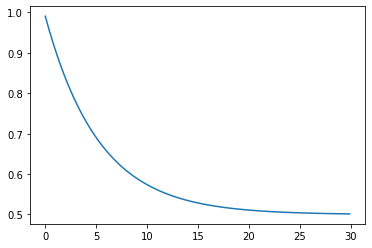

In [6]:
import matplotlib.pyplot as plt
plt.plot(pstep,rhoee)